# BAN5753, Excersice 12
### Vincent Rodriguez, A

https://github.com/0Architectus0/BAN5753_EX12

1. Build a logistic regression model to Predict Target (Enroll). Use all of the data (no splitting of train/validation /test) all potential input variables (no variable selection). Report results from this model and comment on how well does this model work? ​​​​​​​​(1 point)

2. Now run a PCA with all numeric variables (including the binary and ordinal variables). How many PCs would you retain based on Eigen Value > 1 criterion? How much cumulative variance will that extract? How many PCs would you retain based on scree plot criterion? How much cumulative variance will that extract? ​​​​​​​ (1 point)

3. Assume you want to retain PCs such that you extract at least 70% of the variance. Use those retained PCs and rebuild the model in #1 using only the retained PCs as input variables plus all nominal variables with no variable selection. Did this model perform better or worse compared to model in #1? Explain.​ (2 points)

4. Now run a variable clustering with all numeric variables (including the binary and ordinal variables). How many clusters are formed using 2ND Eigen Value > 0.7 criterion? What are the representative variables from each cluster?​(1 point)

5. Use the representative variables from variable clustering in step above and rebuild the model in #1 using only the representative variables as input variables plus the nominal variables with no variable selection. Did this model perform better or worse compared to model in #1 and #4? Explain.​​​(2 points)

6. Now comes the hard part that you need to figure out on your own by going online, or looking at R and Python codes that we may have used in prior classes and/or code snippets provided by TAs in this class. Now, turn-in your fully functional R-code or, a Jupyter notebook of Python codes that we will attempt to run on our side. To get full credits, your code file must do following without any error (3 points)

    a. Import library inside R or Python to read the file given with this exercise
    
    b. Print a bar/pie chart to understand the distribution of values in the Target (Enroll)
    
    c. Print the output from running a logistic regression with Target (Enroll) as dependent variable and use all potential input variables as independent variables.
    
    d. Perform PCA with all the numeric variables (including the binary and ordinal variables). Print the output of screeplot using R or python
    
    e. Perform variable clustering all the numeric variables (including the binary and ordinal variables) using R or Python. Then print the output from variable clustering results.
    
    
### Deliverables:
As you complete the exercise, create a short report in Microsoft Word and in this report answer the questions in the exercise description. Copy and paste supporting documents/diagrams/screenshots as needed to justify your answer. Make sure you print your name, section number, student ID# on the report and turn-in the report as communicated by your instructor. For R/Python part of this assignment, turn-in your codes in an appendix of your report.

## Import Data

In [1]:
import pandas as pd

In [3]:
enroll = pd.read_excel("../data/ENROLLMENT_DATA.xlsx")
enroll.head()

,Target_Enroll,avg_income,CAMPUS_VISIT,CONTACT_CODE1,Contact_Date,Contact_Month,Contact_Year,distance,ETHNICITY,hscrat,...,telecq,TERRITORY,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS,Total,AllocProportion,SampleSize,ActualProportion,SelectionProb,SamplingWeight
0,0,NaN,0,EML,1,Sep,2012,NaN,NaN,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
1,0,NaN,0,SAT,12,Feb,2014,NaN,N,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
2,0,NaN,0,C01,16,Jan,2015,NaN,C,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
3,0,NaN,0,EML,11,Mar,2015,NaN,NaN,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
4,0,NaN,0,TFL,28,Mar,2015,NaN,B,0.037652,...,NaN,N,2,0,2580,0.5,2322,0.5,0.9,1.111111


## Data Preprocessing
### Feature Name Clean-up
These mixed case column names drive me nuts. Found a package to help. Transform column names and check.

There are also extra features other than the ones defined in the data dictionary. Those will be filtered out as well.

In [4]:
# Clean up column names
from skimpy import clean_columns 
enroll_renamed = clean_columns(enroll)

25 column names have been cleaned

In [6]:
enroll_dict = pd.read_csv("../data/data_dictionary.csv")
named = enroll_dict.set_index('Column_Name').T.head()

# Clean up column names
from skimpy import clean_columns 
named_renamed = clean_columns(named)

3 column names have been cleaned

In [7]:
selected_cols = named_renamed.columns.tolist()
selected_cols

['avg_income',
 'campus_visit',
 'contact_code_1',
 'contact_date',
 'contact_month',
 'contact_year',
 'distance',
 'target_enroll',
 'ethnicity',
 'hscrat',
 'init_span',
 'instate',
 'int_1rat',
 'int_2rat',
 'interest',
 'irschool',
 'level_year',
 'mailq',
 'premiere',
 'referral_cntcts',
 'satscore',
 'self_init_cntcts',
 'sex',
 'solicited_cntcts',
 'telecq',
 'territory',
 'total_contacts',
 'travel_init_cntcts']

In [8]:
enroll_renamed.columns.tolist()

['target_enroll',
 'avg_income',
 'campus_visit',
 'contact_code_1',
 'contact_date',
 'contact_month',
 'contact_year',
 'distance',
 'ethnicity',
 'hscrat',
 'id',
 'init_span',
 'instate',
 'int_1rat',
 'int_2rat',
 'interest',
 'irschool',
 'level_year',
 'mailq',
 'premiere',
 'referral_cntcts',
 'satscore',
 'self_init_cntcts',
 'sex',
 'solicited_cntcts',
 'telecq',
 'territory',
 'total_contacts',
 'travel_init_cntcts',
 'total',
 'alloc_proportion',
 'sample_size',
 'actual_proportion',
 'selection_prob',
 'sampling_weight']

In [9]:
# Dropping irschoool as well per the instructions
enroll_reduced = enroll_renamed[selected_cols].drop("irschool", axis='columns')

# Original shape
print("Raw:",enroll_renamed.shape)

# Remove junk columns
print("Reduced:",enroll_reduced.shape)

Raw: (4644, 35)
Reduced: (4644, 27)


### Data Type Check

In [10]:
enroll_reduced.dtypes.sort_values()

travel_init_cntcts      int64
campus_visit            int64
contact_date            int64
solicited_cntcts        int64
contact_year            int64
target_enroll           int64
self_init_cntcts        int64
init_span               int64
referral_cntcts         int64
premiere                int64
total_contacts          int64
interest                int64
mailq                   int64
telecq                float64
sex                   float64
satscore              float64
avg_income            float64
int_1rat              float64
hscrat                float64
distance              float64
int_2rat              float64
instate                object
ethnicity              object
contact_month          object
contact_code_1         object
territory              object
level_year             object
dtype: object

In [11]:
response = ['target_enroll']
binary_features = ['instate','premiere','sex']
nominal_features = ['contact_code_1','contact_date','contact_month','contact_year','ethnicity','instate','territory','level_year']
interval_features = ['avg_income','campus_visit','distance','hscrat','init_span','int_1rat','int_2rat','interest','mailq','referral_cntcts','satscore','self_init_cntcts','solicited_cntcts','telecq','total_contacts','travel_init_cntcts']

### Null Count

In [12]:
#enroll_reduced.[i for i in enroll_reduced.columns if enroll_reduced[i].isnull().any() | ].sum() 
enroll_reduced[enroll_reduced.columns[enroll_reduced.isnull().any()]].isnull().sum().sort_values(ascending=False)
#[count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in numeric_features]

telecq            2749
satscore          1704
avg_income         683
distance           602
ethnicity          537
sex                111
contact_code_1       5
dtype: int64

## Descriptive Stats

In [13]:
enroll_reduced.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avg_income,3961.0,53458.724817,23003.208372,9783.000000,35544.000000,48589.000000,68458.000000,200001.000000
campus_visit,4644.0,0.149871,0.374646,0.000000,0.000000,0.000000,0.000000,2.000000
contact_date,4644.0,15.737295,8.813250,1.000000,7.000000,16.000000,23.000000,31.000000
contact_year,4644.0,2014.613480,0.722727,2010.000000,2014.000000,2015.000000,2015.000000,2016.000000
distance,4042.0,316.312650,368.131106,0.790555,102.108996,159.887072,371.084211,3820.892094
target_enroll,4644.0,0.500000,0.500054,0.000000,0.000000,0.500000,1.000000,1.000000
hscrat,4644.0,0.088487,0.145121,0.000000,0.024096,0.052632,0.095238,1.000000
init_span,4644.0,19.182171,9.257648,-216.000000,12.000000,18.000000,23.000000,72.000000
int_1rat,4644.0,0.045547,0.036270,0.000000,0.020906,0.049270,0.049270,1.000000
int_2rat,4644.0,0.051580,0.038253,0.000000,0.020380,0.056670,0.056670,1.000000


<AxesSubplot: >

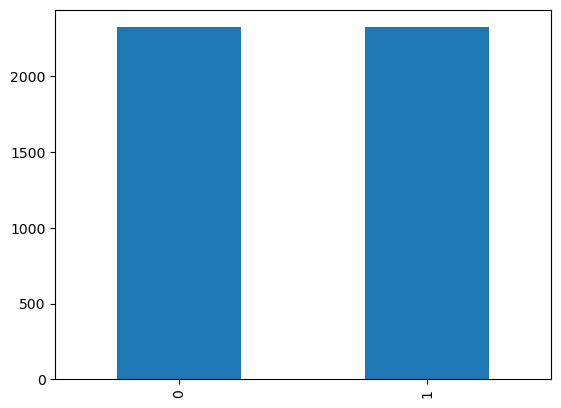

In [15]:
enroll_reduced["target_enroll"].value_counts().plot.bar()

In [37]:
from sklearn.preprocessing import LabelEncoder

enroll_encoded = enroll_renamed.select_dtypes(exclude=['number']) \
                        .apply(LabelEncoder().fit_transform) \
                        .join(enroll_renamed.select_dtypes(include=['number']))

enroll_numeric = enroll_reduced.select_dtypes(include=['number'])

enroll_drop_missing = enroll_numeric.dropna()

In [38]:
enroll_numeric.isna().sum()

avg_income             683
campus_visit             0
contact_date             0
contact_year             0
distance               602
target_enroll            0
hscrat                   0
init_span                0
int_1rat                 0
int_2rat                 0
interest                 0
mailq                    0
premiere                 0
referral_cntcts          0
satscore              1704
self_init_cntcts         0
sex                    111
solicited_cntcts         0
telecq                2749
total_contacts           0
travel_init_cntcts       0
dtype: int64

In [39]:
enroll_drop_missing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avg_income,1530.0,58562.315033,23908.134421,15058.000000,39908.000000,53601.000000,73510.000000,200001.000000
campus_visit,1530.0,0.280392,0.472052,0.000000,0.000000,0.000000,1.000000,2.000000
contact_date,1530.0,16.092810,8.603117,1.000000,8.000000,17.000000,23.000000,31.000000
contact_year,1530.0,2014.577124,0.670503,2011.000000,2014.000000,2015.000000,2015.000000,2016.000000
distance,1530.0,240.156494,305.473144,2.198764,97.657232,149.204410,194.739377,3820.892094
target_enroll,1530.0,0.870588,0.335765,0.000000,1.000000,1.000000,1.000000,1.000000
hscrat,1530.0,0.121853,0.156538,0.000000,0.050000,0.082569,0.127660,1.000000
init_span,1530.0,19.600654,7.862662,7.000000,14.000000,18.500000,23.000000,59.000000
int_1rat,1530.0,0.055696,0.042417,0.000000,0.040752,0.049270,0.052353,1.000000
int_2rat,1530.0,0.061967,0.041989,0.000000,0.053599,0.056670,0.056670,0.600000


In [40]:
enroll_numeric["target_enroll"].value_counts()

0    2322
1    2322
Name: target_enroll, dtype: int64

<AxesSubplot: >

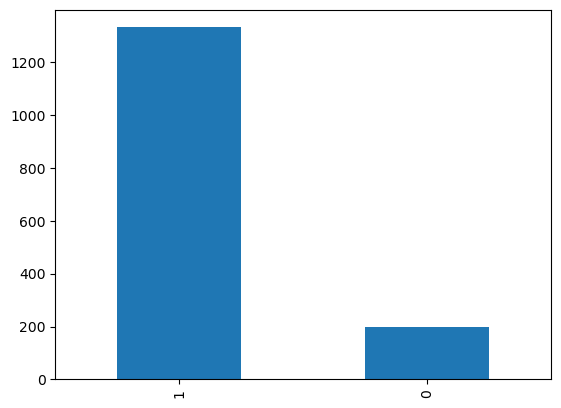

In [41]:
enroll_drop_missing["target_enroll"].value_counts().plot.bar()

In [42]:
enroll_drop_missing["target_enroll"].value_counts()

1    1332
0     198
Name: target_enroll, dtype: int64

After dropping our null rows, we have clear disparity in our response variable levels. The data set is now unbalanced. Given this informaion. It would be beneficial to keep as many rows as possible. To do that we'd need to identify which feature with missing values has the majority of those null values within the 0 level of the response. 

In [43]:
#enroll_renamed.groupby(["target_enroll"]).isnull().sum()

#enroll_renamed.isnull().groupby('target_enroll').sum().astype(int)
enroll_numeric.groupby('target_enroll').apply(lambda x: x.isnull().sum())

,avg_income,campus_visit,contact_date,contact_year,distance,target_enroll,hscrat,init_span,int_1rat,int_2rat,...,mailq,premiere,referral_cntcts,satscore,self_init_cntcts,sex,solicited_cntcts,telecq,total_contacts,travel_init_cntcts
target_enroll,,,,,,,,,,,,,,,,,,,,,
0,550,0,0,0,517,0,0,0,0,0,...,0,0,0,1703,0,109,0,1823,0,0
1,133,0,0,0,85,0,0,0,0,0,...,0,0,0,1,0,2,0,926,0,0


## Objective 1 - Logistic Model
1. Build a logistic regression model to Predict Target (Enroll). Use all of the data (no splitting of train/validation /test) all potential input variables (no variable selection). Report results from this model and comment on how well does this model work? ​​​​​​​​

It's assumed that this model is to serve as a Null Model, or a model to which we will compare the others after making improvements to the data. The only changes made will be to encode the categorical variables and drop all observations containing null instances. 


In [45]:
# Split the response and feature sets
y = enroll_drop_missing['target_enroll']
X = enroll_drop_missing.drop("target_enroll", axis="columns")

In [46]:
# fit a logistic model with sci-kit api
## model would not converge with default of 500 iterations
from sklearn.linear_model import LogisticRegression
LogisticModel = LogisticRegression(max_iter = 750)

model1 = LogisticModel.fit(X, y)

In [47]:
print(model1.intercept_, model1.coef_, model1.score(X, y))

[-2.14767293e-06] [[ 8.48639494e-06  2.17485823e-02 -5.02152363e-04 -7.60215178e-04
   1.03594035e-04  7.85730219e-03 -5.49236328e-02  7.88296228e-04
   1.00690719e-03  1.44093880e-02 -1.52468747e-02  3.03751859e-02
   8.13764689e-03  1.35856868e-03  2.29853953e-01  1.01650595e-02
   1.17342903e-02 -5.63079316e-02  2.53232307e-01  3.50641714e-03]] 0.8901960784313725


In [48]:
y_pred = model1.predict(X)

In [49]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[  35,  163],
       [   5, 1327]])

Text(0.5, 427.9555555555555, 'Predicted label')

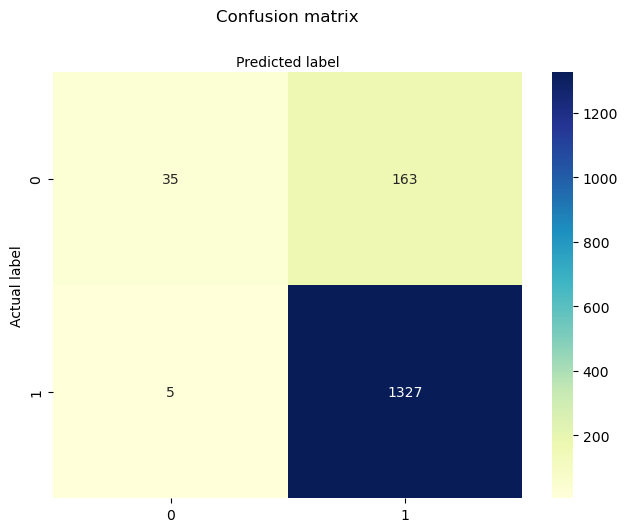

In [50]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

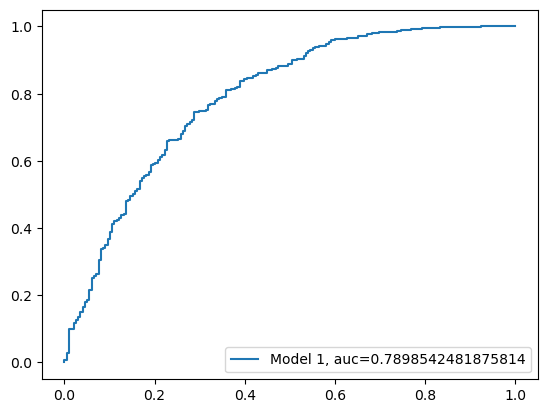

In [51]:
# Receiver Operation Characteristic
y_pred_proba = model1.predict_proba(X)[::,1]

fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)

auc = metrics.roc_auc_score(y, y_pred_proba)

plt.plot(fpr,tpr,label="Model 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [52]:
from sklearn.metrics import classification_report
target_names = ['Not Enrolled', 'Enrolled']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not Enrolled       0.88      0.18      0.29       198
    Enrolled       0.89      1.00      0.94      1332

    accuracy                           0.89      1530
   macro avg       0.88      0.59      0.62      1530
weighted avg       0.89      0.89      0.86      1530



The model has an accuracy of 0.89. Since it is a binary classifcation model, the F1Score reveals an issue. Due to the unbalanced classes the high model accuracy is due to the majority class being correctly classified rather then over-all or balanced assessment of both classes. The above classification matrix illustrates the Type I error associated with the model: a high degree of false-positives relative to True Negatives. 

## Logistic Regression using statsmodels.api

### Uh-oh
The model wouldn't converge with the current feature set. Research suggests the error ("singular matrix") is due to the low-variance of features within the model. The next steps identifies the a variance threshold filter to remove columns with low variablitily. This has to do with the way SciKit implements their models compared to statsmodels. ScKit's default is set to introduce an L2 penealization accounting for highly-correlated features. 

In [53]:
import seaborn as sns
X.corr()

,avg_income,campus_visit,contact_date,contact_year,distance,hscrat,init_span,int_1rat,int_2rat,interest,mailq,premiere,referral_cntcts,satscore,self_init_cntcts,sex,solicited_cntcts,telecq,total_contacts,travel_init_cntcts
avg_income,1.000000,0.077191,-0.003568,-0.015138,-0.008136,0.023057,-0.006380,-0.011773,-0.024323,-0.072073,-0.017016,-0.003499,-0.070398,0.105735,0.027783,-0.023043,-0.080766,-0.057182,-0.002036,0.020501
campus_visit,0.077191,1.000000,-0.007056,-0.032207,0.082916,0.081853,0.041113,0.043424,0.030550,0.087724,-0.206452,-0.153097,0.012413,0.109638,0.236539,0.051385,0.014162,-0.033882,0.203557,0.001346
contact_date,-0.003568,-0.007056,1.000000,0.020187,-0.001624,-0.032971,0.007790,0.010284,0.039724,-0.004786,0.046609,-0.033214,-0.072695,-0.024719,-0.034741,-0.017938,-0.071098,-0.001305,-0.072552,-0.063618
contact_year,-0.015138,-0.032207,0.020187,1.000000,0.088506,0.079237,-0.893879,0.005491,0.003182,-0.037009,0.259487,-0.129699,-0.183507,-0.095893,-0.168693,-0.002774,-0.179537,0.014493,-0.293976,-0.336668
distance,-0.008136,0.082916,-0.001624,0.088506,1.000000,0.444914,-0.095761,-0.163194,-0.177220,-0.016749,0.063533,-0.085542,-0.018131,0.085379,0.025853,0.115184,-0.069132,-0.008508,-0.022098,-0.093110
hscrat,0.023057,0.081853,-0.032971,0.079237,0.444914,1.000000,-0.077171,-0.110642,-0.063410,-0.012787,0.045699,-0.047793,0.026240,0.094301,0.024544,0.058351,-0.049603,-0.043500,-0.026012,-0.147788
init_span,-0.006380,0.041113,0.007790,-0.893879,-0.095761,-0.077171,1.000000,0.004363,-0.025617,0.039504,-0.227270,0.159868,0.206615,0.137753,0.215716,0.005199,0.302582,0.020637,0.355065,0.277406
int_1rat,-0.011773,0.043424,0.010284,0.005491,-0.163194,-0.110642,0.004363,1.000000,0.108010,0.068653,-0.082588,0.051587,0.024518,0.005907,0.063200,0.017847,0.007432,0.000449,0.070225,0.050855
int_2rat,-0.024323,0.030550,0.039724,0.003182,-0.177220,-0.063410,-0.025617,0.108010,1.000000,0.032760,-0.038951,0.079724,-0.003176,-0.031387,0.069748,-0.000616,-0.013868,-0.006950,0.065383,0.045718
interest,-0.072073,0.087724,-0.004786,-0.037009,-0.016749,-0.012787,0.039504,0.068653,0.032760,1.000000,-0.066464,0.094935,0.073873,0.081440,0.165982,0.075089,0.065733,-0.031107,0.181334,0.064835


In [54]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.5):
    # https://stackoverflow.com/a/39813304/1956309
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

# min_variance = .9 * (1 - .9)  # You can play here with different values.
min_variance = 0.0001
low_variance = variance_threshold_selector(X, min_variance) 
print('columns removed:')
#X.columns ^ low_variance.columns
print(X.columns.symmetric_difference(low_variance.columns))
X_lowV = low_variance
# (Logit(y_train, X), logit.fit()... etc)

columns removed:
Index([], dtype='object')


In [56]:
import statsmodels.api as sm
smFitResult = sm.Logit(y,X).fit(maxiter = 1000)

Optimization terminated successfully.
         Current function value: 0.256748
         Iterations 24


In [57]:
smFitResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          target_enroll   No. Observations:                 1530
Model:                          Logit   Df Residuals:                     1511
Method:                           MLE   Df Model:                           18
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                  0.3336
Time:                        05:41:44   Log-Likelihood:                -392.82
converged:                       True   LL-Null:                       -589.46
Covariance Type:            nonrobust   LLR p-value:                 2.315e-72
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
avg_income         -3.851e-07    4.2e-06     -0.092      0.927   -8.61e-06    7.84e-06
campus_visit           1.0984      0.304      3.619      0.000       0.504       1.693
contact_date           0.0002      0.011      0.020      0.984      -0.021       0.022
contact_year          -0.0007      0.000     -1.435      0.151      -0.002       0.000
distance              -0.0003      0.000     -0.697      0.486      -0.001       0.001
hscrat                15.0830      2.319      6.505      0.000      10.538      19.627
init_span             -0.0413      0.013     -3.300      0.001      -0.066      -0.017
int_1rat               4.6533      4.013      1.160      0.246      -3.211      12.518
int_2rat               5.5868      3.372      1.657      0.098      -1.022      12.196
interest               0.2521      0.221      1.142      0.253      -0.181       0.685
mailq                  0.1052      0.071      1.488      0.137      -0.033       0.244
premiere               0.7857      0.265      2.962      0.003       0.266       1.306
referral_cntcts        0.4949   1.89e+06   2.61e-07      1.000   -3.71e+06    3.71e+06
satscore               0.0011      0.001      1.566      0.117      -0.000       0.003
self_init_cntcts      -0.0066   1.89e+06  -3.47e-09      1.000   -3.71e+06    3.71e+06
sex                    0.3044      0.192      1.584      0.113      -0.072       0.681
solicited_cntcts      -0.1210   1.89e+06  -6.39e-08      1.000   -3.71e+06    3.71e+06
telecq                -0.7816      0.128     -6.096      0.000      -1.033      -0.530
total_contacts         0.3114   1.89e+06   1.64e-07      1.000   -3.71e+06    3.71e+06
travel_init_cntcts    -0.0559   1.89e+06  -2.95e-08      1.000   -3.71e+06    3.71e+06
======================================================================================
"""

## Objective 2- PCA 
2. Now run a PCA with all numeric variables (including the binary and ordinal variables). How many PCs would you retain based on Eigen Value > 1 criterion? How much cumulative variance will that extract? How many PCs would you retain based on scree plot criterion? How much cumulative variance will that extract? ​​​​​​​ (1 point)


In [60]:
from varclushi import VarClusHi
from sklearn.decomposition import PCA as pca
from sklearn import preprocessing

import matplotlib.pyplot as plt

In [66]:
pca_reduce_x = X

min_max_scaler = preprocessing.MinMaxScaler()
pca_reduce_x  = min_max_scaler.fit_transform(pca_reduce_x)
pca_result = pca(n_components= len(X.columns)).fit(pca_reduce_x)

pca_result.explained_variance_

array([2.65940568e-01, 2.38189710e-01, 2.00267618e-01, 8.20143073e-02,
       5.71418921e-02, 4.79392911e-02, 3.92993640e-02, 2.74944995e-02,
       2.62990460e-02, 1.96096556e-02, 1.67763622e-02, 1.64910262e-02,
       1.39646312e-02, 7.57179406e-03, 5.60819132e-03, 5.39731906e-03,
       3.93388708e-03, 1.86599867e-03, 1.68112928e-03, 2.52576113e-33])

In [67]:
pca_result.components_.T* np.sqrt(pca_result.explained_variance_)

array([[ 1.46927737e-04,  2.76510405e-03,  3.99935085e-03,
        -4.88858122e-04,  1.56689571e-02, -5.11069050e-03,
        -1.59715067e-03, -2.63757239e-02,  2.42152891e-03,
        -5.58188450e-02,  6.09955726e-02, -7.17515173e-02,
         5.99598520e-02,  1.04206159e-02,  1.83377688e-03,
         3.77049175e-03,  2.42107392e-03,  4.08407481e-04,
         1.06099832e-04,  1.33563622e-33],
       [-1.27201999e-02, -2.90244137e-02,  7.71635280e-02,
         6.31850153e-04,  1.97323705e-01,  7.89568734e-02,
        -2.60434442e-02, -1.86946086e-02, -3.99616055e-02,
         1.59820922e-02,  8.49571992e-03, -9.08137575e-03,
        -2.24086925e-02,  6.27816391e-03, -5.84041901e-05,
         1.33999784e-03, -6.23725196e-04, -2.23404155e-04,
        -2.18799873e-04, -5.65666648e-33],
       [-2.08905652e-02,  7.49012648e-03, -1.41520343e-02,
         2.85446075e-01,  2.22869284e-03,  2.54731849e-03,
         8.82435546e-04, -2.69745114e-04,  4.93791126e-03,
        -2.42425503e-03,  1.7

([<matplotlib.axis.XTick at 0x7f03ffd59420>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

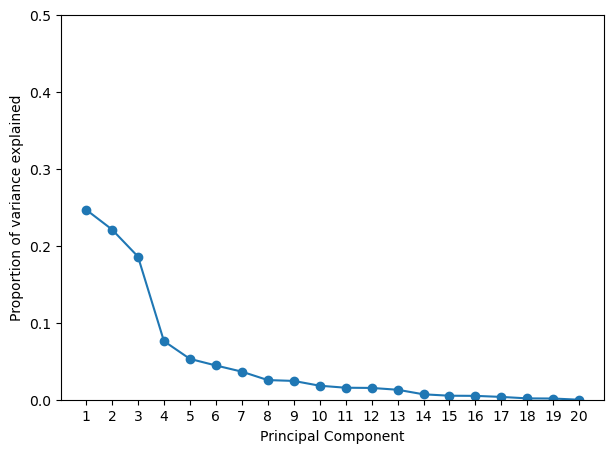

In [70]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of variance explained')
plt.xlabel('Principal Component')
plt.ylim(0,0.5)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [74]:
var_clus_model = VarClusHi(X, maxeigval2 = 0.7, maxclus = None)
var_clus_model.varclus()

In [75]:
var_clus_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,premiere,0.527753,0.023439,0.483581
1,0,self_init_cntcts,0.899349,0.055951,0.106616
2,0,total_contacts,0.885864,0.179260,0.139064
3,1,contact_year,0.946940,0.119212,0.060242
4,1,init_span,0.946940,0.091556,0.058408
5,2,distance,0.722457,0.031407,0.286542
6,2,hscrat,0.722457,0.012557,0.281073
7,3,campus_visit,1.000000,0.017353,0.000000
8,4,mailq,0.745315,0.062552,0.271679
9,4,travel_init_cntcts,0.745315,0.099554,0.282843
